# Datasets for testing and demonstration of SeismicPro features

* [Teapot dome 3D survey subset](#Teapot-dome-3D-survey-subset)

## Teapot dome 3D survey subset

Dataset consists of 10 raw field records from [Teapot dome 3D survey open dataset](https://wiki.seg.org/wiki/Teapot_dome_3D_survey) by RMOTC and the U.S. Department of Energy.

This dataset can be used for testing and demostartion, its size is only 76M.

Below we show sample trace headers and sample seismogram from the dataset.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from seismicpro.src import SeismicDataset, FieldIndex

Sample trace headers:

In [2]:
field_index = FieldIndex(name='raw', path='demo_data/teapot_dome_10.sgy', extra_headers=['offset'])
field_index.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
173,6645,1,1,data/teapot_dome_10.sgy
173,6739,2,2,data/teapot_dome_10.sgy
173,6839,3,3,data/teapot_dome_10.sgy
173,6944,4,4,data/teapot_dome_10.sgy
173,7055,5,5,data/teapot_dome_10.sgy


Total number of field records and traces:

In [3]:
len(field_index), sum(field_index.tracecounts)

(10, 9444)

Number of traces in field records

In [4]:
field_index.tracecounts

array([912, 912, 912, 912, 966, 966, 966, 966, 966, 966])

Field records sorted by offset

Traces length: 2049


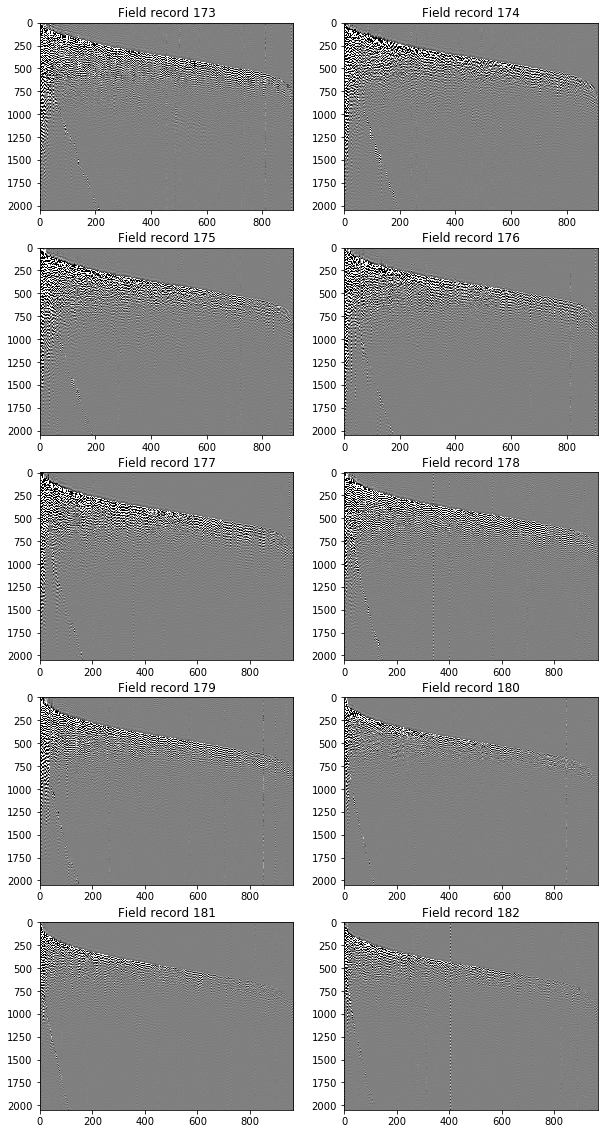

In [5]:
batch = (SeismicDataset(field_index).next_batch(len(field_index))
         .load(fmt='segy', components='raw')
         .sort_traces(src='raw', dst='raw', sort_by='offset'))

print("Traces length:", len(batch.meta['raw']['samples']))

cv = 0.0005

_, axs = plt.subplots(5, 2, figsize=(10, 20))
axs = np.asarray(axs).flatten()

for i, arr in enumerate(batch.raw):
    axs[i].imshow(arr.T,  vmin=-cv, vmax=cv, cmap='gray', aspect='auto')
    axs[i].set_title("Field record {}".format(batch.indices[i]))